In [9]:
#https://www.analyticsvidhya.com/blog/2018/05/essentials-of-deep-learning-trudging-into-unsupervised-deep-learning/
#https://www.dlology.com/blog/how-to-do-unsupervised-clustering-with-keras/

from sklearn.cluster import KMeans
from keras.datasets import mnist
import os
import keras
#import metrics
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
import tensorflow as tf
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

import nets
#from evolutron.motifs import motif_extraction
from evolutron.templates import callback_templates as cb
from evolutron.extra_metrics import mean_cat_acc
from evolutron.tools import Handle, load_dataset, load_random_aa_seqs, preprocess_dataset
from keras import backend

from keras.layers import Activation, BatchNormalization, Convolution1D, Dense, Flatten, GlobalMaxPooling1D, Input,MaxPooling1D, Reshape, Conv2DTranspose, UpSampling1D


Using TensorFlow backend.


In [ ]:
x_data, _ = load_dataset("example/sprot_dna_tf_pfam.tsv")
x_data = preprocess_dataset(x_data, padded=not False)
train_x = x_data

In [ ]:
def mean_cat_acc(y_true, y_pred):
    #y_true = K.print_tensor(y_true,"Shape of the y_true {0}".format(y_true.shape))
    nb_categories = K.shape(y_true)[-1]
    with tf.Session() as sess:
        print(nb_categories.eval(session=sess))
    print("NB Categories {0}".format(nb_categories))
    y_true = K.reshape(y_true, shape=(-1, nb_categories))
    y_pred = K.reshape(y_pred, shape=(-1, nb_categories))
    with tf.Session() as sess:
        print(y_true.eval(session=sess))
    print("Shape of the y_trueafter reshape {0}".format(K.int_shape(y_true)))
    real_len = K.sum(y_true)
    #real_len = K.print_tensor(real_len, message="real_len is: ")
    print("Real len of protein {0}".format(real_len.get_shape()))
    is_real = K.sum(y_true, -1)
    with tf.Session() as sess:
        print(real_len.eval(session=sess))
    print("Is_real value {0}".format(is_real.get_shape()[0].value))
    s = K.sum(K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), 'float32') * is_real)
    print("S value {0}".format(s.get_shape()))
    #s = K.print_tensor(s, message="s is: ")
    with tf.Session() as sess:
        print(K.sum(y_true).eval(session=sess))
        print(s.eval(session=sess))
    return s / real_len

In [ ]:
mean_cat_acc(x_data[0],x_data[100])

In [ ]:
val1 = np.arange(24).reshape((4, 6))
#K.print_tensor(s, message="s is: ")
x=K.sum(val1)
print(tf.shape(x))

In [ ]:
x_data[1]

In [11]:
import numpy as np
import dill as pickle
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#Printing the input parameters
infile = open("example/Opt_output_50_0.01_1e-6/models/1905234618.flags",'rb')
obj = pickle.load(infile)
for attribute, value in obj.items():
    print('{} : {}'.format(attribute, value))

In [ ]:
b = np.load('example/Opt_output_0.01_1e-6/models/3368454666.history.npz')

In [ ]:
for attribute, value in b.items():
    print('{} : {}'.format(attribute, value))

In [ ]:
plt.plot(b["mean_cat_acc"][1:10], color = 'blue',label='Training Set')
plt.plot(b["val_mean_cat_acc"][1:10], color='green', label='Test Set')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
#plt.title('Sequence length distribution')
plt.show()

In [ ]:
plt.plot(b["loss"][0:10], color = 'blue',label='Training Set')
plt.plot(b["val_loss"][0:10], color='green', label='Test Set')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss function')
#plt.title('Sequence length distribution')
plt.show()

In [24]:
import os
import re
import numpy as np
##Prepare the data for the multiplot
path = './example/'
files = []
regDir1= re.compile("Opt_output_50_*_*")
#regDir1= re.compile("Opt_output_*_*_*")
reg_compile= re.compile("^[0-9]+.history.npz")
# r=root, d=directories, f = files
files={}
for d in os.listdir(path):
    if  regDir1.match(d):
        s = d.split("_")
        batchSize=s[2]
        regRate=s[3]
        learRate=s[4]
        #files[s[2]]={}
        for r,di,f in os.walk(os.path.join(path,d,"models")):
            for file in f:
                if  reg_compile.match(file):
                    #print(os.path.join(r,file))
                    if batchSize in files.keys(): 
                        t = files[batchSize]
                        if regRate in t.keys():
                            t1=t[regRate]
                            t1.update({learRate:os.path.join(r,file)})
                        else:
                            t.update({regRate:{learRate:os.path.join(r,file)}})
                    else:
                        files[batchSize]={regRate:{learRate:os.path.join(r,file)}}
print(files)
                    

{'50': {'0.05': {'1e-5': './example/Opt_output_50_0.05_1e-5/models/4351343203.history.npz', '1e-6': './example/Opt_output_50_0.05_1e-6/models/5188886041.history.npz', '1e-4': './example/Opt_output_50_0.05_1e-4/models/8875455046.history.npz'}, '0.01': {'1e-5': './example/Opt_output_50_0.01_1e-5/models/2452304272.history.npz', '1e-6': './example/Opt_output_50_0.01_1e-6/models/1905234618.history.npz', '1e-4': './example/Opt_output_50_0.01_1e-4/models/9024801221.history.npz'}, '0.1': {'1e-5': './example/Opt_output_50_0.1_1e-5/models/8192735629.history.npz', '1e-6': './example/Opt_output_50_0.1_1e-6/models/9663734968.history.npz', '1e-4': './example/Opt_output_50_0.1_1e-4/models/6433203726.history.npz'}}}


In [25]:
batchSizes = ["50"]
regularizeRates = ["0.01","0.05","0.1"]
learningRates = ["1e-6","1e-5","1e-4"]
accuracyValues={}
lossValues={}
for batch in batchSizes:
    batchLoss={}
    batchAcc={}
    for regRates in regularizeRates:
        regRatesLoss={}
        regRatesAcc={}
        for learningRate in learningRates:
            #b = np.load('example/Opt_output'+'_'+batch+'_'+regRates+'_'+learningRate+'/models/3368454666.history.npz')
            b = np.load(files[batch][regRates][learningRate])
            regRatesLoss[learningRate] = {"loss":b["loss"],"val_loss":b["val_loss"]}
            regRatesAcc[learningRate] = {"mean_cat_acc":b["mean_cat_acc"],"val_mean_cat_acc":b["val_mean_cat_acc"]}
        batchLoss[regRates]=regRatesLoss
        batchAcc[regRates]=regRatesAcc
    accuracyValues[batch]=batchAcc
    lossValues[batch]=batchLoss
#print(lossValues)

In [29]:
accuracyValues["50"]["0.01"]["1e-6"]

array([0.06294584, 0.06583231, 0.07817059, 0.0897097 , 0.09180076])

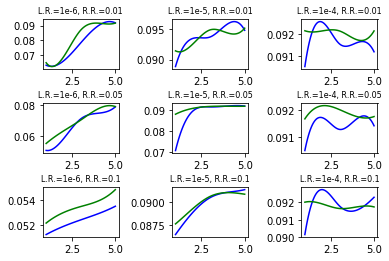

In [26]:
from scipy.interpolate import make_interp_spline, BSpline
f, axarr = plt.subplots(3, 3)
for i in range(0,len(regularizeRates)):
        for j in range(0,len(learningRates)):
            #axarr[i, j].plot(accuracyValues["50"][regularizeRates[i]][learningRates[j]]["mean_cat_acc"], y)
            T=len(accuracyValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["mean_cat_acc"])
            xnew = np.linspace(1,T,100) #300 represents number of points to make between T.min and T.max
            power=accuracyValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["mean_cat_acc"]
            spl = make_interp_spline([*range(1,T+1)], power, k=3) #BSpline object
            power_smooth = spl(xnew)
            axarr[i, j].plot(xnew,power_smooth, color = 'blue',label='Training Set')
            power=accuracyValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["val_mean_cat_acc"]
            spl = make_interp_spline([*range(1,T+1)], power, k=3) #BSpline object
            power_smooth = spl(xnew)
            axarr[i, j].plot(xnew,power_smooth, color='green', label='Test Set')
            axarr[i, j].set_title('L.R.='+learningRates[j]+', R.R.='+regularizeRates[i],fontsize=8)
f.subplots_adjust(hspace=0.7,wspace=0.7)
plt.show()
f.savefig("optmizing_accuracy_"+batchSizes[0]+"-smooth.pdf", bbox_inches='tight')                                                          

In [ ]:
f, axarr = plt.subplots(3, 3)
for i in range(0,len(regularizeRates)):
        for j in range(0,len(learningRates)):
            #axarr[i, j].plot(accuracyValues["50"][regularizeRates[i]][learningRates[j]]["mean_cat_acc"], y)
            axarr[i, j].plot(accuracyValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["mean_cat_acc"], color = 'blue',label='Training Set')
            axarr[i, j].plot(accuracyValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["val_mean_cat_acc"], color='green', label='Test Set')
            axarr[i, j].set_title('L.R.='+learningRates[j]+', R.R.='+regularizeRates[i],fontsize=8)
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 2]], visible=False)
f.subplots_adjust(hspace=0.7,wspace=0.7)
plt.show()
f.savefig("optmizing_accuracy_"+batchSizes[0]+".pdf", bbox_inches='tight')                                                          

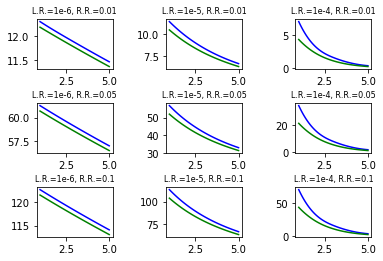

In [30]:
f, axarr = plt.subplots(3, 3)
for i in range(0,len(regularizeRates)):
        for j in range(0,len(learningRates)):
            #axarr[i, j].plot(accuracyValues["50"][regularizeRates[i]][learningRates[j]]["mean_cat_acc"], y)
            T=len(lossValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["loss"])
            xnew = np.linspace(1,T,100) #300 represents number of points to make between T.min and T.max
            power=lossValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["loss"]
            spl = make_interp_spline([*range(1,T+1)], power, k=3) #BSpline object
            power_smooth = spl(xnew)
            axarr[i, j].plot(xnew,power_smooth, color = 'blue',label='Training Set')
            power=lossValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["val_loss"]
            spl = make_interp_spline([*range(1,T+1)], power, k=3) #BSpline object
            power_smooth = spl(xnew)
            axarr[i, j].plot(xnew,power_smooth, color='green', label='Test Set')
            axarr[i, j].set_title('L.R.='+learningRates[j]+', R.R.='+regularizeRates[i],fontsize=8)
            #axarr[i, j].plot(lossValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["loss"], color = 'blue',label='Training Set')
            #axarr[i, j].plot(lossValues[batchSizes[0]][regularizeRates[i]][learningRates[j]]["val_loss"], color='green', label='Test Set')
            #axarr[i, j].set_title('Rates ['+regularizeRates[i]+','+learningRates[j]+']')
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 2]], visible=False)
f.subplots_adjust(hspace=0.7,wspace=0.7)
plt.show()
f.savefig("optmizing_loss_"+batchSizes[0]+"-smooth.pdf", bbox_inches='tight') 